# #**VeReMi: A Dataset for Comparable Evaluation of Misbehavior Detection in VANETs**

About Dataset
The VeReMi dataset is created to assess the effectiveness of misbehavior detection methods in Vehicular Ad-HocNetworks (VANETs). It comprises message logs from onboard units, accompanied by a labeled ground truth generated from a simulated environment. The dataset includes malicious messages that cause incorrect application behavior, which the misbehavior detection mechanisms aim to prevent. The initial release of the VeReMidataset contains simple attacks, but it seeks to be a starting point for more complex attacks. The message logs of each vehicle contain GPS data (labeled as type=2) about the local car and Basic Safety Messages (BSM) (labeled as type=3) received from other vehicles via Dedicated Short-Range Communications (DSRC).
The VeReMi dataset has two primary objectives. Firstly, it serves as a benchmark for evaluating the performance of misbehavior detection mechanisms on a city-wide scale. Secondly, it saves computational resources typically required to run VEINS frequently. The VeReMi dataset contains different density levels, attacks, and attacker densities. VeReMi-extension, or VeReMi, is a dataset created to test and compare different methods of identifying VANET activity. The VeReMi dataset is an invaluable resource for researchers interested in evaluating and enhancing the effectiveness of misbehavior detection mechanisms for VANETs.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vmi-mini/mini_vermi.csv
/kaggle/input/veremi-dataset/Veremi_final_dataset.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv('/kaggle/input/veremi-dataset/Veremi_final_dataset.csv')
# df = pd.read_csv('/kaggle/input/vmi-mini/mini_vermi.csv')

In [4]:
df

,Unnamed: 0,type,rcvTime,pos_0,pos_1,pos_noise_0,pos_noise_1,spd_0,spd_1,spd_noise_0,...,acl_0,acl_1,acl_noise_0,acl_noise_1,hed_0,hed_1,hed_noise_0,hed_noise_1,attack,attack_type
0,0,3,27371.216284,981.098535,908.497891,3.826423,3.964059,-17.723786,-2.154895,-0.024182,...,-0.248402,-0.177659,0.000784,1.114785e-03,-0.971331,-0.237732,44.022409,33.840519,0,RandomSpeedOffset
1,1,3,52060.561117,1213.025174,984.277524,4.477449,4.459375,14.504808,2.605276,-0.008523,...,-0.653850,-0.117125,0.000001,1.847528e-07,0.992578,0.121610,2.560114,8.414909,0,DataReplay
2,2,3,28156.319142,140.514133,944.338854,2.965184,3.066191,-0.346027,4.671520,-0.000469,...,0.333247,-4.486889,0.000448,6.050771e-03,0.256103,0.966649,15.915074,9.636057,1,DoSDisruptive
3,3,3,28671.375689,558.005547,327.316562,4.934159,5.037039,11.792797,4.028876,0.022346,...,-0.030639,-0.010265,0.000066,2.237617e-05,0.954113,0.299446,2.854203,6.203941,1,RandomSpeedOffset
4,4,2,53612.000000,689.179631,547.143780,3.327547,3.374621,3.887137,-8.732709,0.000090,...,-1.829939,4.111129,0.000028,6.361425e-05,0.360402,-0.932797,5.648109,19.951521,0,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22165605,22165605,3,26625.228276,269.115394,221.485812,3.639919,3.386238,-8.300488,-1.330502,0.016346,...,4.446163,0.716958,0.007319,4.833149e-03,-0.998507,0.054632,17.373540,8.653378,0,ConstPos
22165606,22165606,3,27500.186511,224.666440,859.740381,3.223376,3.139665,-2.230908,14.447055,0.003544,...,-0.023170,0.156311,0.000065,1.722914e-05,0.158782,0.987314,15.243281,2.875833,1,DataReplay
22165607,22165607,3,50555.773355,809.926551,758.261899,3.845163,3.521880,-7.527460,3.662441,0.009083,...,-1.612424,0.784034,0.001494,2.158883e-03,-0.781532,0.623865,30.244891,9.878268,0,DoSDisruptiveSybil
22165608,22165608,3,53185.074189,647.564971,700.928206,4.226780,4.343972,-0.119584,-0.053815,-0.000026,...,0.094900,0.042773,0.000033,1.484357e-05,-0.993449,-0.114277,14.846941,14.749614,0,RandomSpeedOffset


In [5]:
df.isna().sum()

Unnamed: 0     0
type           0
rcvTime        0
pos_0          0
pos_1          0
pos_noise_0    0
pos_noise_1    0
spd_0          0
spd_1          0
spd_noise_0    0
spd_noise_1    0
acl_0          0
acl_1          0
acl_noise_0    0
acl_noise_1    0
hed_0          0
hed_1          0
hed_noise_0    0
hed_noise_1    0
attack         0
attack_type    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.attack_type.value_counts()

attack_type
GridSybil             1246576
DoS                   1228655
DoSDisruptive         1224482
DoSRandom             1223169
DoSDisruptiveSybil    1185897
DoSRandomSybil        1185897
DataReplaySybil       1143918
DelayedMessages       1143918
ConstSpeedOffset      1143918
DataReplay            1143918
RandomSpeed           1143918
RandomPosOffset       1143918
RandomPos             1143918
Disruptive            1143918
EventualStop          1143918
ConstPos              1143918
ConstSpeed            1143918
ConstPosOffset        1143918
RandomSpeedOffset     1143918
Name: count, dtype: int64

In [8]:
# df.attack['ConstPos','ConstPosOffset','RandomSpeed','RandomSpeedOffset'],

In [9]:
df['attack_type'].replace({'EventualStop': 0, 'GridSybil': 0,'DoSRandom':0, 'DoSDisruptiveSybil':0,'DelayedMessages':0,
                            'Disruptive':0, 'DoSDisruptive':0,'DataReplaySybil':0,'DataReplay':0 , 'DoSRandomSybil':0,
                            'DoS':0,

                            'ConstSpeedOffset':1 , 'ConstSpeed':1 , 'RandomSpeed':1 , 'RandomSpeedOffset':1  ,'RandomPos':1 ,
                            'ConstPos':1 ,'ConstPosOffset':1 , 'RandomPosOffset':1 ,

                           } , inplace=True)

df['attack_type'].value_counts()
# d.value_counts()

attack_type
0    13014266
1     9151344
Name: count, dtype: int64

In [10]:
df.attack.value_counts()

attack
0    12131310
1    10034300
Name: count, dtype: int64

In [11]:
# # Import label encoder
# from sklearn import preprocessing

# # label_encoder object knows
# # how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in column 'species'.
# df.attack_type= label_encoder.fit_transform(df.attack_type)

# df.attack_type.unique()

In [12]:
# df.drop(['Unnamed: 0', 'type','attack_type',"Unnamed: 0.1"],axis=1,inplace=True)

In [13]:
df.shape


(22165610, 21)

In [14]:
df.head()

,Unnamed: 0,type,rcvTime,pos_0,pos_1,pos_noise_0,pos_noise_1,spd_0,spd_1,spd_noise_0,...,acl_0,acl_1,acl_noise_0,acl_noise_1,hed_0,hed_1,hed_noise_0,hed_noise_1,attack,attack_type
0,0,3,27371.216284,981.098535,908.497891,3.826423,3.964059,-17.723786,-2.154895,-0.024182,...,-0.248402,-0.177659,0.000784,1.114785e-03,-0.971331,-0.237732,44.022409,33.840519,0,1
1,1,3,52060.561117,1213.025174,984.277524,4.477449,4.459375,14.504808,2.605276,-0.008523,...,-0.653850,-0.117125,0.000001,1.847528e-07,0.992578,0.121610,2.560114,8.414909,0,0
2,2,3,28156.319142,140.514133,944.338854,2.965184,3.066191,-0.346027,4.671520,-0.000469,...,0.333247,-4.486889,0.000448,6.050771e-03,0.256103,0.966649,15.915074,9.636057,1,0
3,3,3,28671.375689,558.005547,327.316562,4.934159,5.037039,11.792797,4.028876,0.022346,...,-0.030639,-0.010265,0.000066,2.237617e-05,0.954113,0.299446,2.854203,6.203941,1,1
4,4,2,53612.000000,689.179631,547.143780,3.327547,3.374621,3.887137,-8.732709,0.000090,...,-1.829939,4.111129,0.000028,6.361425e-05,0.360402,-0.932797,5.648109,19.951521,0,0


All contineous features

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22165610 entries, 0 to 22165609
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   type         int64  
 2   rcvTime      float64
 3   pos_0        float64
 4   pos_1        float64
 5   pos_noise_0  float64
 6   pos_noise_1  float64
 7   spd_0        float64
 8   spd_1        float64
 9   spd_noise_0  float64
 10  spd_noise_1  float64
 11  acl_0        float64
 12  acl_1        float64
 13  acl_noise_0  float64
 14  acl_noise_1  float64
 15  hed_0        float64
 16  hed_1        float64
 17  hed_noise_0  float64
 18  hed_noise_1  float64
 19  attack       int64  
 20  attack_type  int64  
dtypes: float64(17), int64(4)
memory usage: 3.5 GB


Dtype - Float

In [16]:
# df.isna().sum()

In [17]:
# df.drop(['attack_type'],axis=1,inplace=True)

No null value

<Axes: >

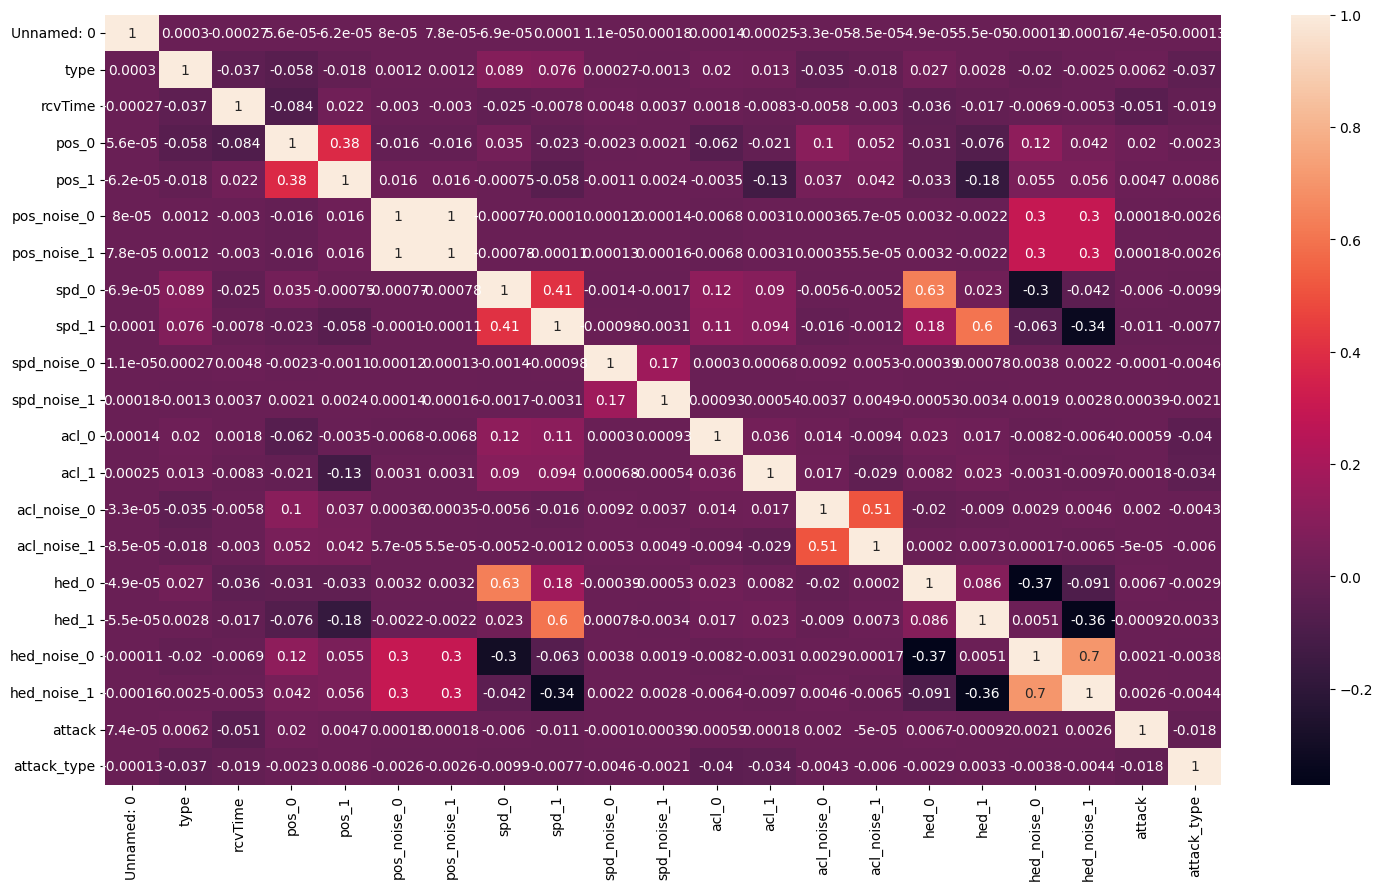

In [18]:
## Check for multicollinearity
plt.figure(figsize=(18,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22165610 entries, 0 to 22165609
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Unnamed: 0   int64  
 1   type         int64  
 2   rcvTime      float64
 3   pos_0        float64
 4   pos_1        float64
 5   pos_noise_0  float64
 6   pos_noise_1  float64
 7   spd_0        float64
 8   spd_1        float64
 9   spd_noise_0  float64
 10  spd_noise_1  float64
 11  acl_0        float64
 12  acl_1        float64
 13  acl_noise_0  float64
 14  acl_noise_1  float64
 15  hed_0        float64
 16  hed_1        float64
 17  hed_noise_0  float64
 18  hed_noise_1  float64
 19  attack       int64  
 20  attack_type  int64  
dtypes: float64(17), int64(4)
memory usage: 3.5 GB


In [20]:
# df.to_csv('Clean-vermi-Mini.csv')

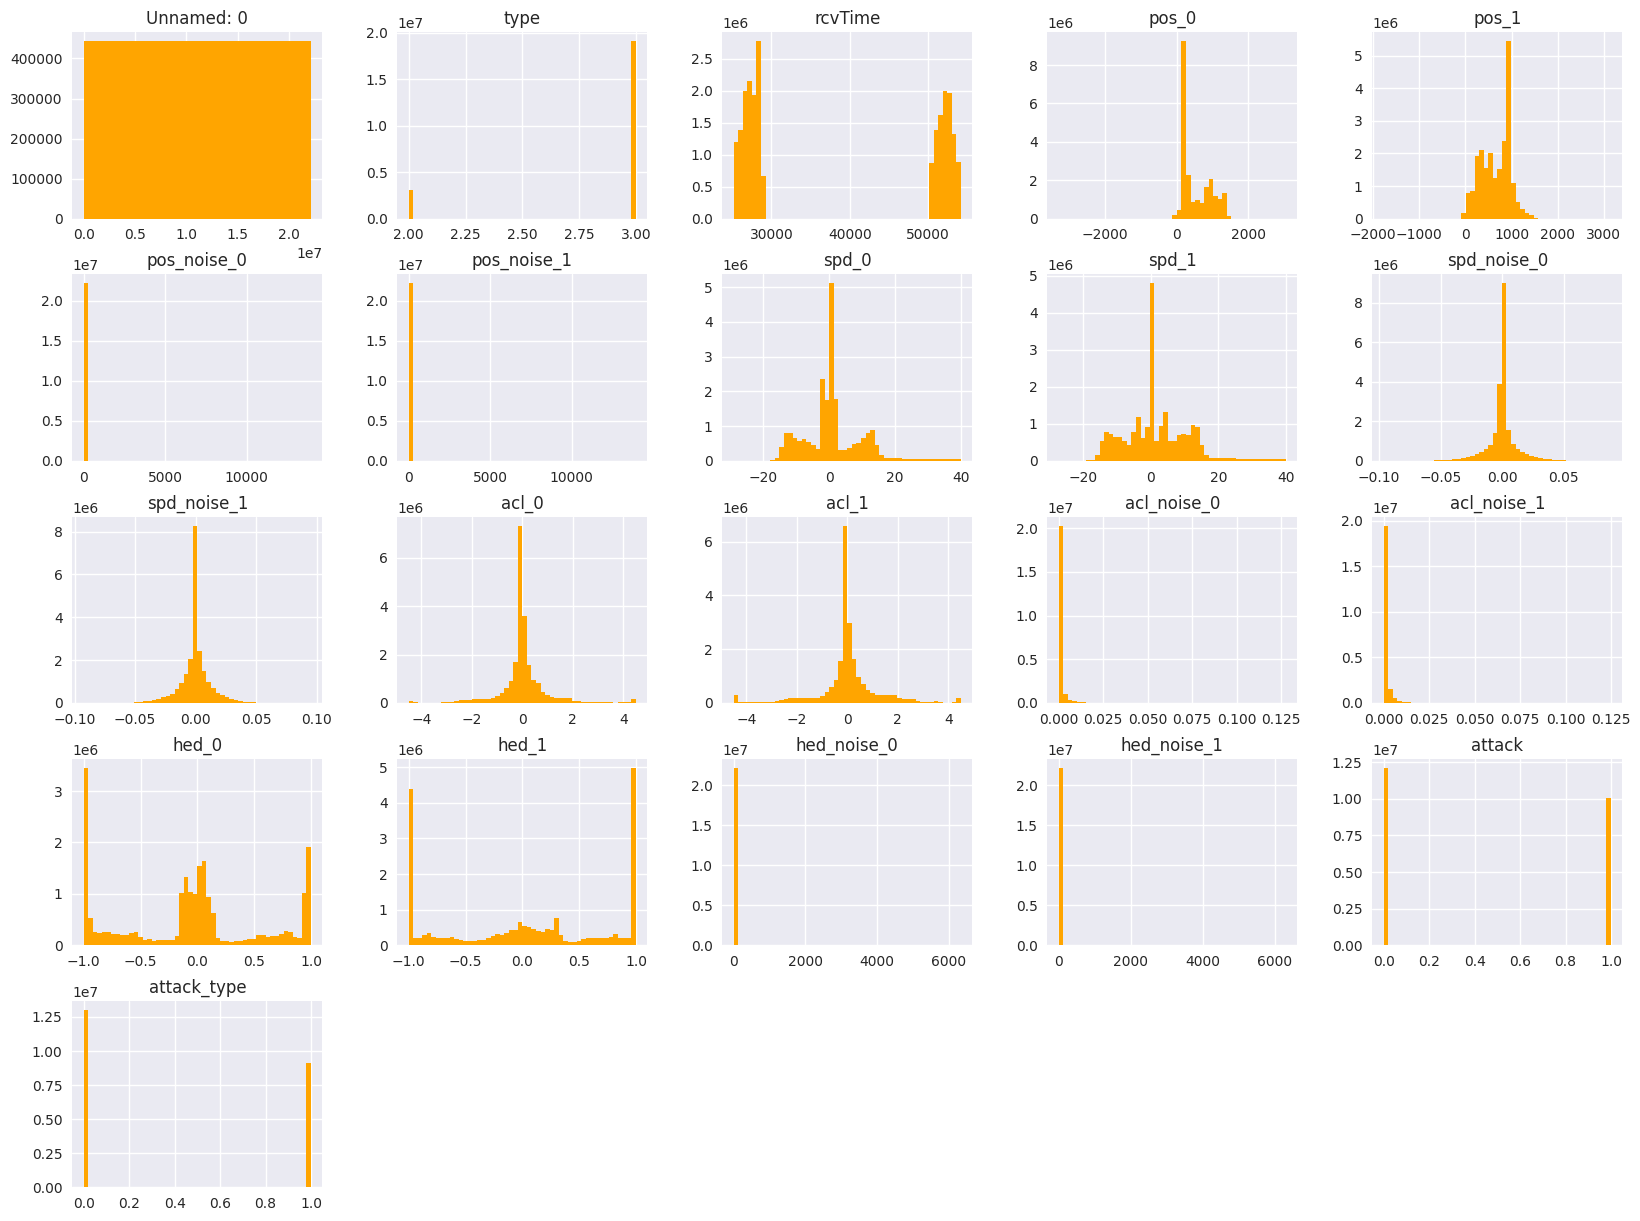

In [21]:
## Plot desnity plot for all features
plt.style.use('seaborn')
pd.DataFrame(df).hist(bins=50,figsize=(20,15),color='orange')
plt.show()

In [22]:
df.columns

Index(['Unnamed: 0', 'type', 'rcvTime', 'pos_0', 'pos_1', 'pos_noise_0',
       'pos_noise_1', 'spd_0', 'spd_1', 'spd_noise_0', 'spd_noise_1', 'acl_0',
       'acl_1', 'acl_noise_0', 'acl_noise_1', 'hed_0', 'hed_1', 'hed_noise_0',
       'hed_noise_1', 'attack', 'attack_type'],
      dtype='object')

In [23]:
# df.drop(['pos_noise_0','pos_noise_1','hed_noise_0','hed_noise_1','acl_noise_0','acl_noise_1','Unnamed: 0','Unnamed: 0.1'],axis=1,inplace=True)
df.drop(['pos_noise_0','pos_noise_1','hed_noise_0','hed_noise_1','acl_noise_0','acl_noise_1','Unnamed: 0'],axis=1,inplace=True)

In [24]:

#Train Test Split
from sklearn.model_selection import train_test_split
x,y=train_test_split(df,test_size=0.30,random_state=2529)

In [25]:
x.head()

,type,rcvTime,pos_0,pos_1,spd_0,spd_1,spd_noise_0,spd_noise_1,acl_0,acl_1,hed_0,hed_1,attack,attack_type
8169244,3,51929.426849,510.605423,819.083859,7.501020,-10.102533,0.010602,-0.014297,-0.109768,0.149286,0.555777,-0.831331,0,0
821139,3,52756.504372,244.224834,207.078289,-1.816628,12.570859,0.000467,-0.003229,0.013766,-0.095171,-0.120707,0.992688,0,0
12256275,3,25417.418497,153.070968,901.927470,0.255362,-3.439220,-0.000716,0.009662,-0.332736,4.487713,-0.015150,-0.999885,1,0
1624067,3,26840.133360,183.045940,662.434632,2.238080,-14.713405,0.001119,-0.007355,-0.031084,0.204414,0.020933,-0.999781,1,1
13600172,2,50586.000000,221.176863,874.347100,-1.909882,12.379845,0.002079,-0.013452,0.661809,-4.276609,0.148788,0.988869,1,0


In [26]:
x.shape

(15515927, 14)

In [37]:
#  'pos_noise_0', 'pos_noise_1','acl_noise_0', 'acl_noise_1',  'hed_noise_0',
#        'hed_noise_1'
# X=x[[ 'rcvTime','pos_0', 'pos_1'  , 'spd_0', 'spd_1', 'spd_noise_0', 'spd_noise_1', 'acl_0',
#        'acl_1','hed_0', 'hed_1']]

X=df.drop(['attack_type','attack'],axis=1)
y=df['attack_type']

In [38]:


X.shape

(22165610, 12)

In [39]:
pd.DataFrame(X)

,type,rcvTime,pos_0,pos_1,spd_0,spd_1,spd_noise_0,spd_noise_1,acl_0,acl_1,hed_0,hed_1
0,3,27371.216284,981.098535,908.497891,-17.723786,-2.154895,-0.024182,-0.017303,-0.248402,-0.177659,-0.971331,-0.237732
1,3,52060.561117,1213.025174,984.277524,14.504808,2.605276,-0.008523,-0.001531,-0.653850,-0.117125,0.992578,0.121610
2,3,28156.319142,140.514133,944.338854,-0.346027,4.671520,-0.000469,0.006336,0.333247,-4.486889,0.256103,0.966649
3,3,28671.375689,558.005547,327.316562,11.792797,4.028876,0.022346,0.007632,-0.030639,-0.010265,0.954113,0.299446
4,2,53612.000000,689.179631,547.143780,3.887137,-8.732709,0.000090,-0.000203,-1.829939,4.111129,0.360402,-0.932797
...,...,...,...,...,...,...,...,...,...,...,...,...
22165605,3,26625.228276,269.115394,221.485812,-8.300488,-1.330502,0.016346,0.002626,4.446163,0.716958,-0.998507,0.054632
22165606,3,27500.186511,224.666440,859.740381,-2.230908,14.447055,0.003544,-0.022927,-0.023170,0.156311,0.158782,0.987314
22165607,3,50555.773355,809.926551,758.261899,-7.527460,3.662441,0.009083,-0.004416,-1.612424,0.784034,-0.781532,0.623865
22165608,3,53185.074189,647.564971,700.928206,-0.119584,-0.053815,-0.000026,-0.000012,0.094900,0.042773,-0.993449,-0.114277


In [40]:
# x.to_csv('X.csv')

In [41]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=2529,stratify=y)

In [42]:
X_train.shape

(17732488, 12)

In [43]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17732488 entries, 16882488 to 17242077
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   type         int64  
 1   rcvTime      float64
 2   pos_0        float64
 3   pos_1        float64
 4   spd_0        float64
 5   spd_1        float64
 6   spd_noise_0  float64
 7   spd_noise_1  float64
 8   acl_0        float64
 9   acl_1        float64
 10  hed_0        float64
 11  hed_1        float64
dtypes: float64(11), int64(1)
memory usage: 1.7 GB
<class 'pandas.core.frame.DataFrame'>
Index: 4433122 entries, 10429134 to 18063589
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   type         int64  
 1   rcvTime      float64
 2   pos_0        float64
 3   pos_1        float64
 4   spd_0        float64
 5   spd_1        float64
 6   spd_noise_0  float64
 7   spd_noise_1  float64
 8   acl_0        float64
 9   acl_1        float64
 10  hed_0        float64
 11  hed_1    

(None, None)

In [44]:
y_train.value_counts(),y_test.value_counts()

(attack_type
 0    10411413
 1     7321075
 Name: count, dtype: int64,
 attack_type
 0    2602853
 1    1830269
 Name: count, dtype: int64)

In [45]:
# Feature Selection based on correlaltion
X_train.corr()

,type,rcvTime,pos_0,pos_1,spd_0,spd_1,spd_noise_0,spd_noise_1,acl_0,acl_1,hed_0,hed_1
type,1.000000,-0.037306,-0.057513,-0.017653,0.088933,0.075569,0.000235,-0.001231,0.019668,0.013328,0.026463,0.002639
rcvTime,-0.037306,1.000000,-0.084533,0.022251,-0.025026,-0.007697,0.004808,0.003882,0.001755,-0.008356,-0.036308,-0.017386
pos_0,-0.057513,-0.084533,1.000000,0.384210,0.034587,-0.023353,-0.002236,0.001922,-0.062127,-0.020923,-0.031444,-0.075846
pos_1,-0.017653,0.022251,0.384210,1.000000,-0.000769,-0.058196,-0.001152,0.002232,-0.003542,-0.132264,-0.032793,-0.176944
spd_0,0.088933,-0.025026,0.034587,-0.000769,1.000000,0.406819,-0.001373,-0.001611,0.120945,0.089883,0.632969,0.023180
spd_1,0.075569,-0.007697,-0.023353,-0.058196,0.406819,1.000000,-0.000954,-0.002938,0.106343,0.093667,0.175109,0.601809
spd_noise_0,0.000235,0.004808,-0.002236,-0.001152,-0.001373,-0.000954,1.000000,0.168426,0.000408,0.000740,-0.000497,0.000819
spd_noise_1,-0.001231,0.003882,0.001922,0.002232,-0.001611,-0.002938,0.168426,1.000000,0.000973,-0.000265,-0.000486,-0.003344
acl_0,0.019668,0.001755,-0.062127,-0.003542,0.120945,0.106343,0.000408,0.000973,1.000000,0.035819,0.022464,0.016763
acl_1,0.013328,-0.008356,-0.020923,-0.132264,0.089883,0.093667,0.000740,-0.000265,0.035819,1.000000,0.008047,0.022951


<Axes: >

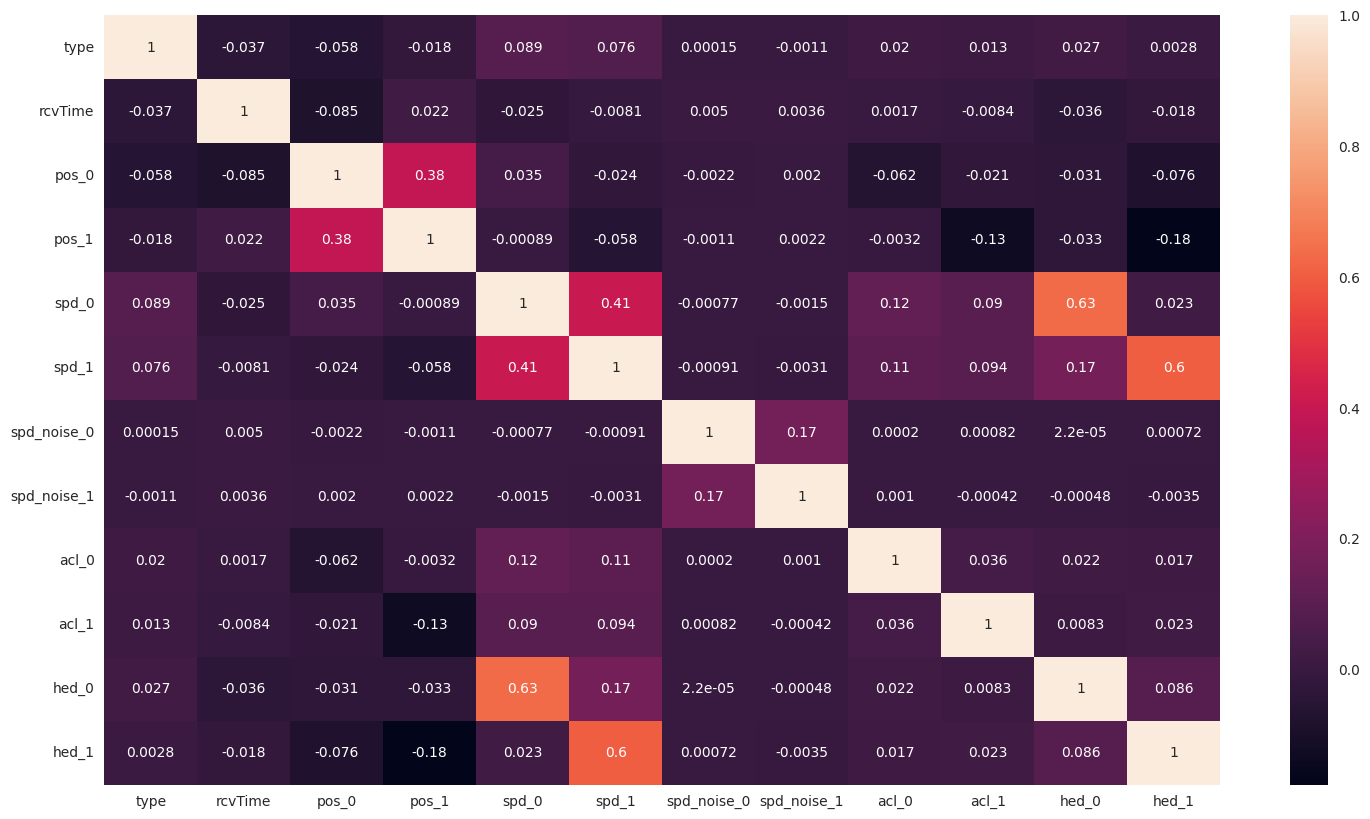

In [36]:
# Check for multicollinearity
plt.figure(figsize=(18,10))

corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [46]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [47]:
# threshold--Domain expertise
corr_features=correlation(X_train,0.70)

In [48]:
corr_features

set()

In [49]:
# drop features when correlation is more than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((17732488, 12), (4433122, 12))

In [50]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=StandardScaler()
mm=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [63]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,8.866244e+06,8.866244e+06,8.866244e+06,8.866244e+06,8.866244e+06,8.866244e+06,8.866244e+06,8.866244e+06,8.866244e+06,8.866244e+06,8.866244e+06,8.866244e+06
mean,-4.318035e-17,-7.219492e-16,2.328884e-15,-2.945871e-15,-1.341720e-16,8.122371e-17,3.582268e-18,-4.183319e-18,-2.654484e-17,-1.683746e-17,-2.349511e-17,3.317805e-19
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.502644e+00,-1.074241e+00,-9.317083e+00,-7.627266e+00,-3.225333e+00,-2.969450e+00,-8.311442e+00,-7.273348e+00,-4.828248e+00,-3.788717e+00,-1.456072e+00,-1.384073e+00
25%,3.995774e-01,-9.170605e-01,-8.201762e-01,-8.596610e-01,-3.820429e-01,-5.893441e-01,-2.064139e-01,-3.128249e-01,-2.206906e-01,-1.973491e-01,-9.187753e-01,-1.080350e+00
50%,3.995774e-01,-8.010170e-01,-6.277007e-01,1.856218e-01,-1.291907e-01,-1.889561e-01,-3.199959e-03,3.441354e-03,-4.600737e-02,-2.569281e-02,6.516328e-02,2.717019e-02
75%,3.995774e-01,1.076948e+00,8.961908e-01,7.710834e-01,3.547818e-01,6.140949e-01,2.086425e-01,3.132231e-01,1.813678e-01,2.288422e-01,4.383478e-01,1.086504e+00
max,3.995774e-01,1.259312e+00,6.121374e+00,7.853925e+00,4.144129e+00,3.912983e+00,7.639312e+00,7.502727e+00,4.742676e+00,3.741687e+00,1.663235e+00,1.288808e+00


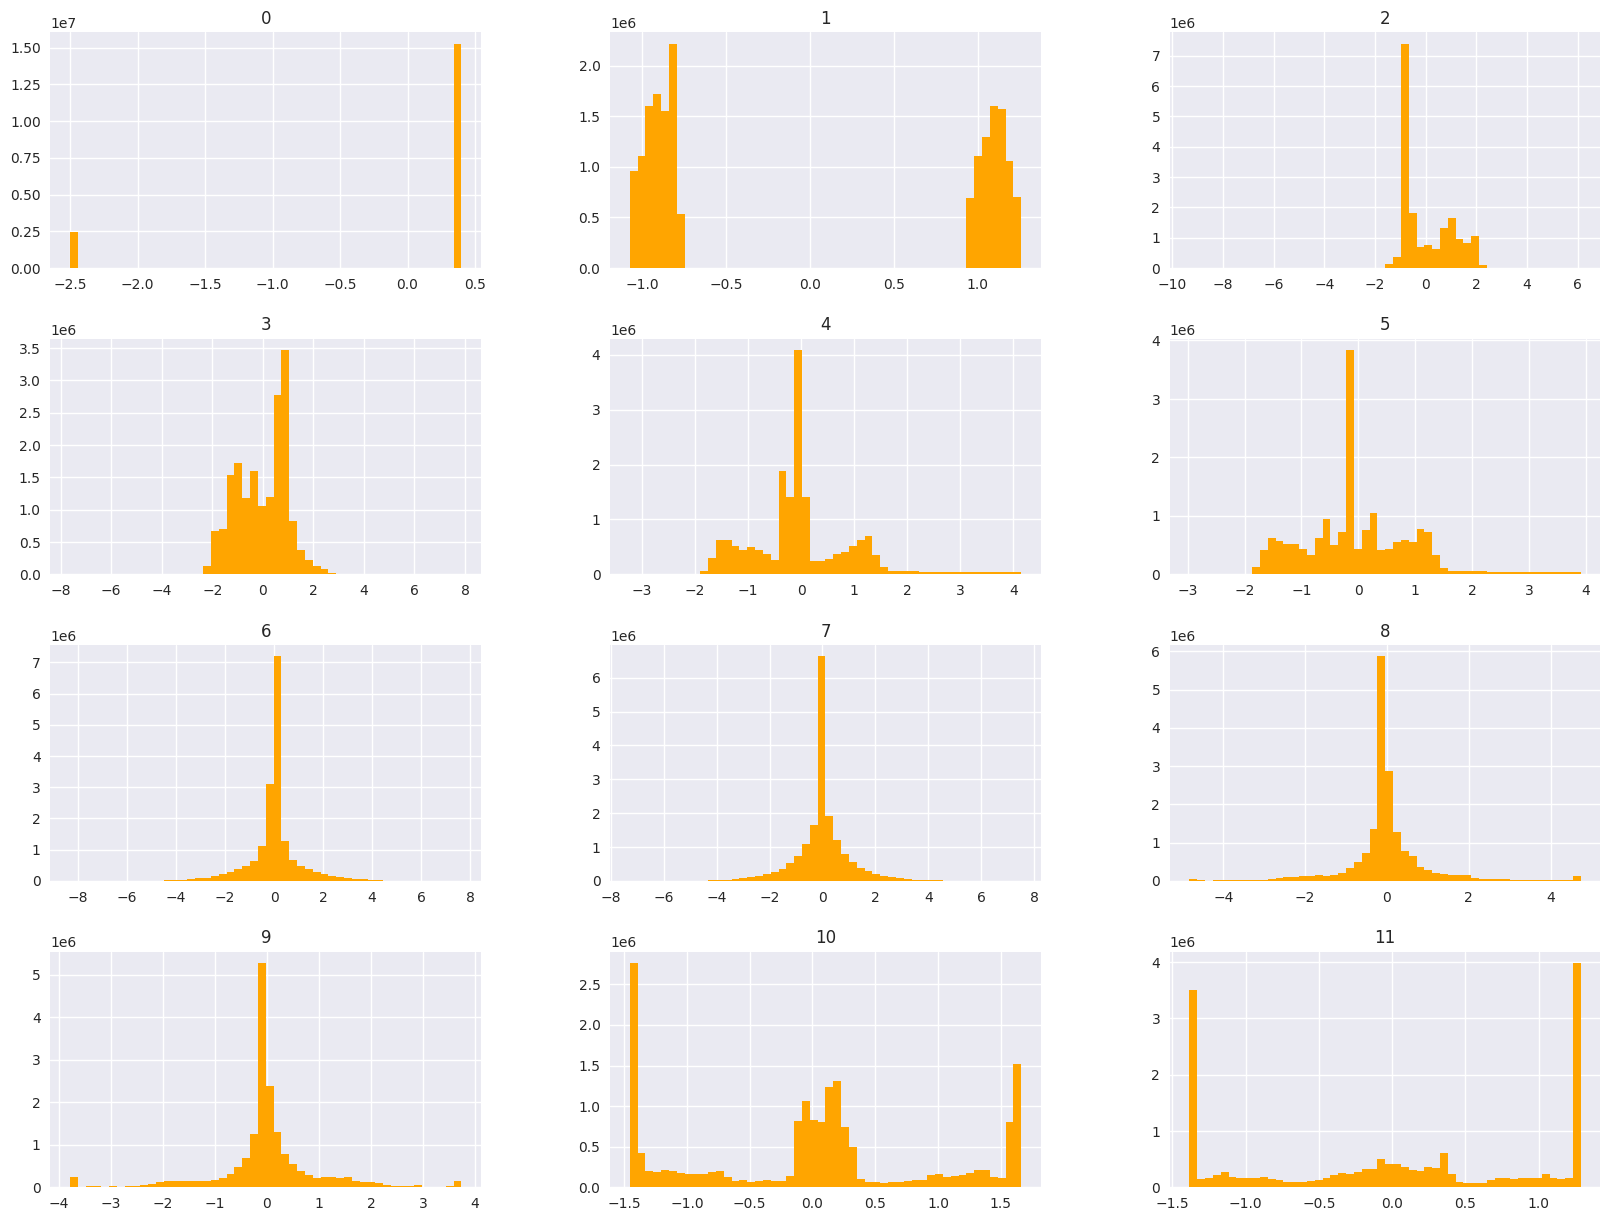

In [104]:
## Plot desnity plot for all features
plt.style.use('seaborn')
pd.DataFrame(X_train_scaled).hist(bins=50,figsize=(20,15),color='orange')
plt.show()

In [106]:
pd.DataFrame(X_test_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11
count,4.433122e+06,4.433122e+06,4.433122e+06,4.433122e+06,4.433122e+06,4.433122e+06,4.433122e+06,4.433122e+06,4.433122e+06,4.433122e+06,4.433122e+06,4.433122e+06
mean,1.358582e-03,2.936553e-04,-5.364137e-04,-1.375973e-03,3.759469e-04,1.441966e-04,-7.255146e-04,-8.452205e-04,-2.926447e-04,2.591617e-04,-3.508206e-05,6.021242e-04
std,9.985709e-01,1.000058e+00,9.998515e-01,1.000407e+00,1.000222e+00,1.000198e+00,1.000469e+00,1.000610e+00,1.000361e+00,1.000837e+00,9.995174e-01,1.000269e+00
min,-2.500937e+00,-1.074080e+00,-9.271543e+00,-7.669571e+00,-3.225503e+00,-2.925544e+00,-8.265136e+00,-7.210927e+00,-4.826668e+00,-3.790066e+00,-1.455622e+00,-1.383939e+00
25%,3.998502e-01,-9.169981e-01,-8.202381e-01,-8.603196e-01,-3.819193e-01,-5.897869e-01,-2.072822e-01,-3.152240e-01,-2.212610e-01,-1.979013e-01,-9.171761e-01,-1.080422e+00
50%,3.998502e-01,-8.008931e-01,-6.284089e-01,1.814512e-01,-1.290235e-01,-1.887128e-01,-3.516131e-03,3.032542e-03,-4.594077e-02,-2.606802e-02,6.493094e-02,2.760287e-02
75%,3.998502e-01,1.077176e+00,8.953369e-01,7.696673e-01,3.564256e-01,6.143684e-01,2.082068e-01,3.134128e-01,1.809805e-01,2.291253e-01,4.362621e-01,1.087721e+00
max,3.998502e-01,1.259530e+00,6.027692e+00,7.817984e+00,4.144762e+00,3.913584e+00,7.641156e+00,7.478321e+00,4.739818e+00,3.742286e+00,1.663002e+00,1.289321e+00


Text(0.5, 1.0, 'X_train After Scaling')

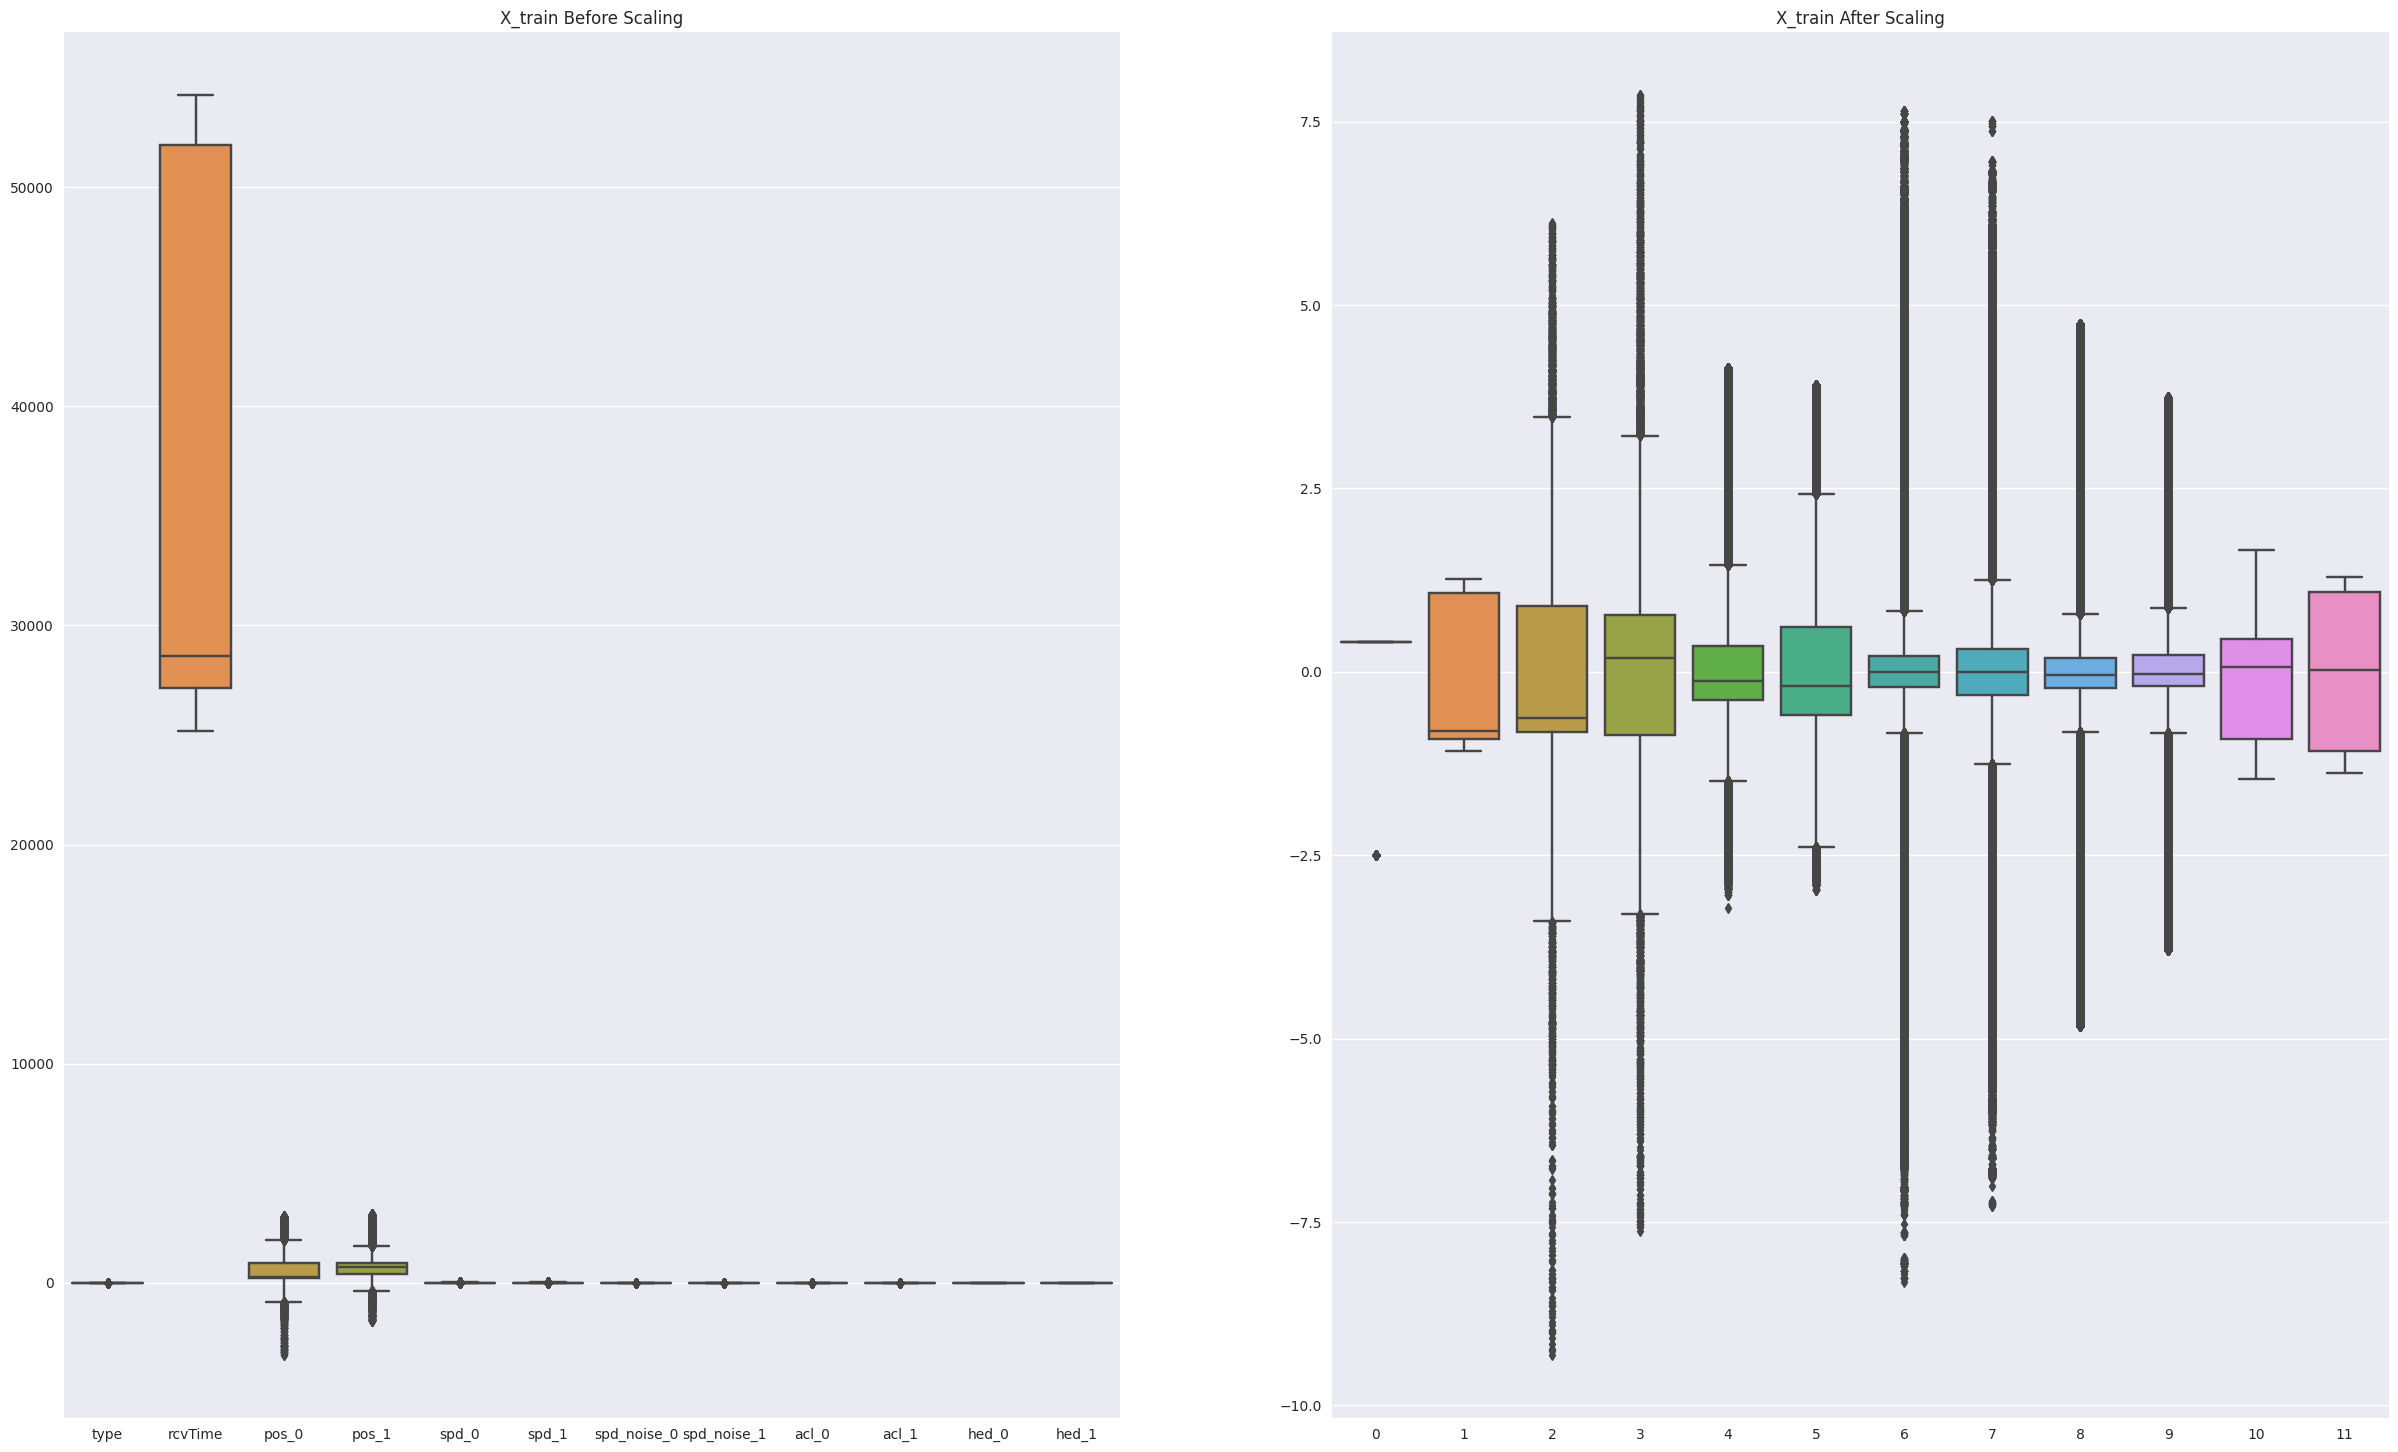

In [107]:
plt.subplots(figsize=(30, 18))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

.


‎

In [108]:
# !pip install xgboost

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,\
                            confusion_matrix

In [49]:
models={

    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier(),
    "Adaboost":AdaBoostClassifier(),
    "Xgboost":XGBClassifier(),
    "Gausian":GaussianNB(),
    "Bernoulli":BernoulliNB(),
    "knn"    :KNeighborsClassifier(),
    # "svm"    :SVC() we can't use svm because of high computation
}



for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)



      # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred) # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision, add average='weighted'
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall, add average='weighted'
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred) #Calculate Roc, add multi_class='ovr'


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred) # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision, add average='weighted'
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall, add average='weighted'
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc, add multi_class='ovr'


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

Logisitic Regression
Model performance for Training set
- Accuracy: 0.5851
- F1 score: 0.0292
- Precision: 0.4373
- Recall: 0.0151
- Roc Auc Score: 0.5007
----------------------------------
Model performance for Test set
- Accuracy: 0.5849
- F1 score: 0.0283
- Precision: 0.4307
- Recall: 0.0147
- Roc Auc Score: 0.5005


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7429
- F1 score: 0.6880
- Precision: 0.6899
- Recall: 0.6860
- Roc Auc Score: 0.7345


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.7788
- F1 score: 0.7000
- Precision: 0.7960
- Recall: 0.6247
- Roc Auc Score: 0.7560


Gradient Boost
Model performance for Training se

.

.

.

.

Logiatic Regression


              precision    recall  f1-score   support

           0       0.59      0.99      0.74    364275
           1       0.43      0.01      0.03    256362

    accuracy                           0.59    620637
   macro avg       0.51      0.50      0.38    620637
weighted avg       0.52      0.59      0.44    620637

[[359557   4718]
 [252776   3586]]


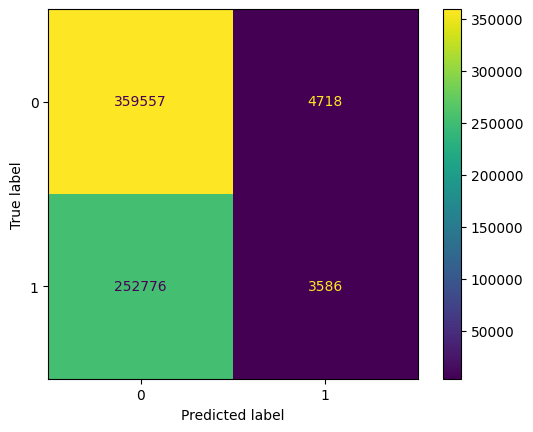

In [42]:
lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)# model training

lr_pred = lr.predict(X_test_scaled)# testing

print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred,  labels=lr.classes_))
cm=confusion_matrix(y_test,lr_pred,  labels=lr.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_).plot()

In [43]:
y_pred_new_threshold = (lr.predict_proba(X_test_scaled)[:, 1] >= 0.59).astype(int)
print(y_pred_new_threshold)

[0 0 0 ... 0 0 0]


In [44]:

# Evaluation metrics for new threshold
print("Evaluation metrics with threshold 0.9:")
print("Accuracy:", accuracy_score(y_test, y_pred_new_threshold))
print("Precision:", precision_score(y_test, y_pred_new_threshold))
print("Recall:", recall_score(y_test, y_pred_new_threshold))
print("F1 score:", f1_score(y_test, y_pred_new_threshold))
print(classification_report(y_test,y_pred_new_threshold))

Evaluation metrics with threshold 0.9:
Accuracy: 0.5869389030947236
Precision: 1.0
Recall: 3.900734118161038e-06
F1 score: 7.801437804987459e-06
              precision    recall  f1-score   support

           0       0.59      1.00      0.74    364275
           1       1.00      0.00      0.00    256362

    accuracy                           0.59    620637
   macro avg       0.79      0.50      0.37    620637
weighted avg       0.76      0.59      0.43    620637



Naive bayes: Bernouli NB

              precision    recall  f1-score   support



           0       0.59      0.97      0.73     89105

           1       0.47      0.04      0.07     62784



    accuracy                           0.58    151889

   macro avg       0.53      0.50      0.40    151889

weighted avg       0.54      0.58      0.46    151889



[[86249  2856]

 [60300  2484]]


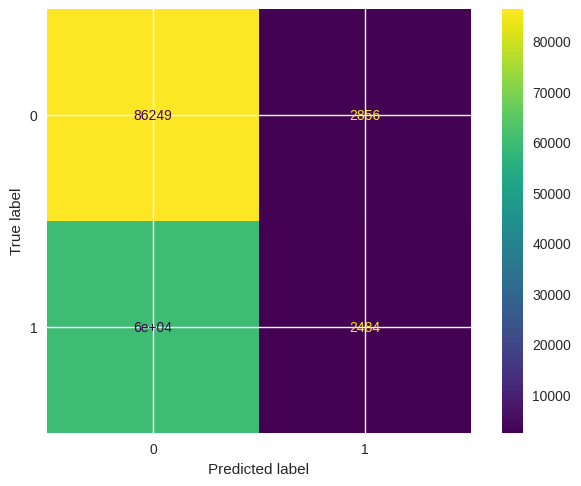

In [ ]:
nb=BernoulliNB()
nb.fit(X_train_scaled,y_train)# model training

lr_pred = nb.predict(X_test_scaled)# testing

print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred,  labels=lr.classes_))
cm=confusion_matrix(y_test,lr_pred,  labels=lr.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_).plot()

K-Nearest Neighbour

              precision    recall  f1-score   support



           0       0.69      0.76      0.73     89105

           1       0.61      0.51      0.56     62784



    accuracy                           0.66    151889

   macro avg       0.65      0.64      0.64    151889

weighted avg       0.66      0.66      0.66    151889



[[68120 20985]

 [30518 32266]]


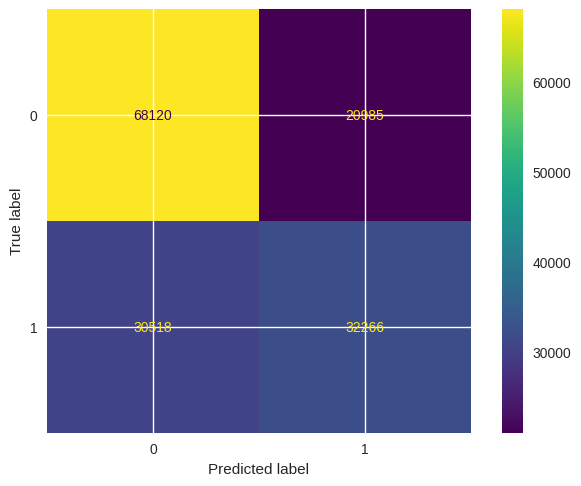

In [ ]:
knn=KNeighborsClassifier()
knn.fit(X_train_scaled,y_train)# model training

lr_pred = knn.predict(X_test_scaled)# testing

print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred,  labels=lr.classes_))
cm=confusion_matrix(y_test,lr_pred,  labels=lr.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_).plot()

Decision Tree

In [53]:
dt=DecisionTreeClassifier()
dt.fit(X_train_scaled,y_train)# model training

lr_pred = dt.predict(X_test_scaled)# testing

print(classification_report(y_test,lr_pred))
# print(confusion_matrix(y_test,lr_pred,  labels=lr.classes_))
cm=confusion_matrix(y_test,lr_pred,  labels=lr.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_).plot()

              precision    recall  f1-score   support

           0       0.96      0.96      0.96   2602853
           1       0.94      0.94      0.94   1830269

    accuracy                           0.95   4433122
   macro avg       0.95      0.95      0.95   4433122
weighted avg       0.95      0.95      0.95   4433122



NameError: name 'lr' is not defined

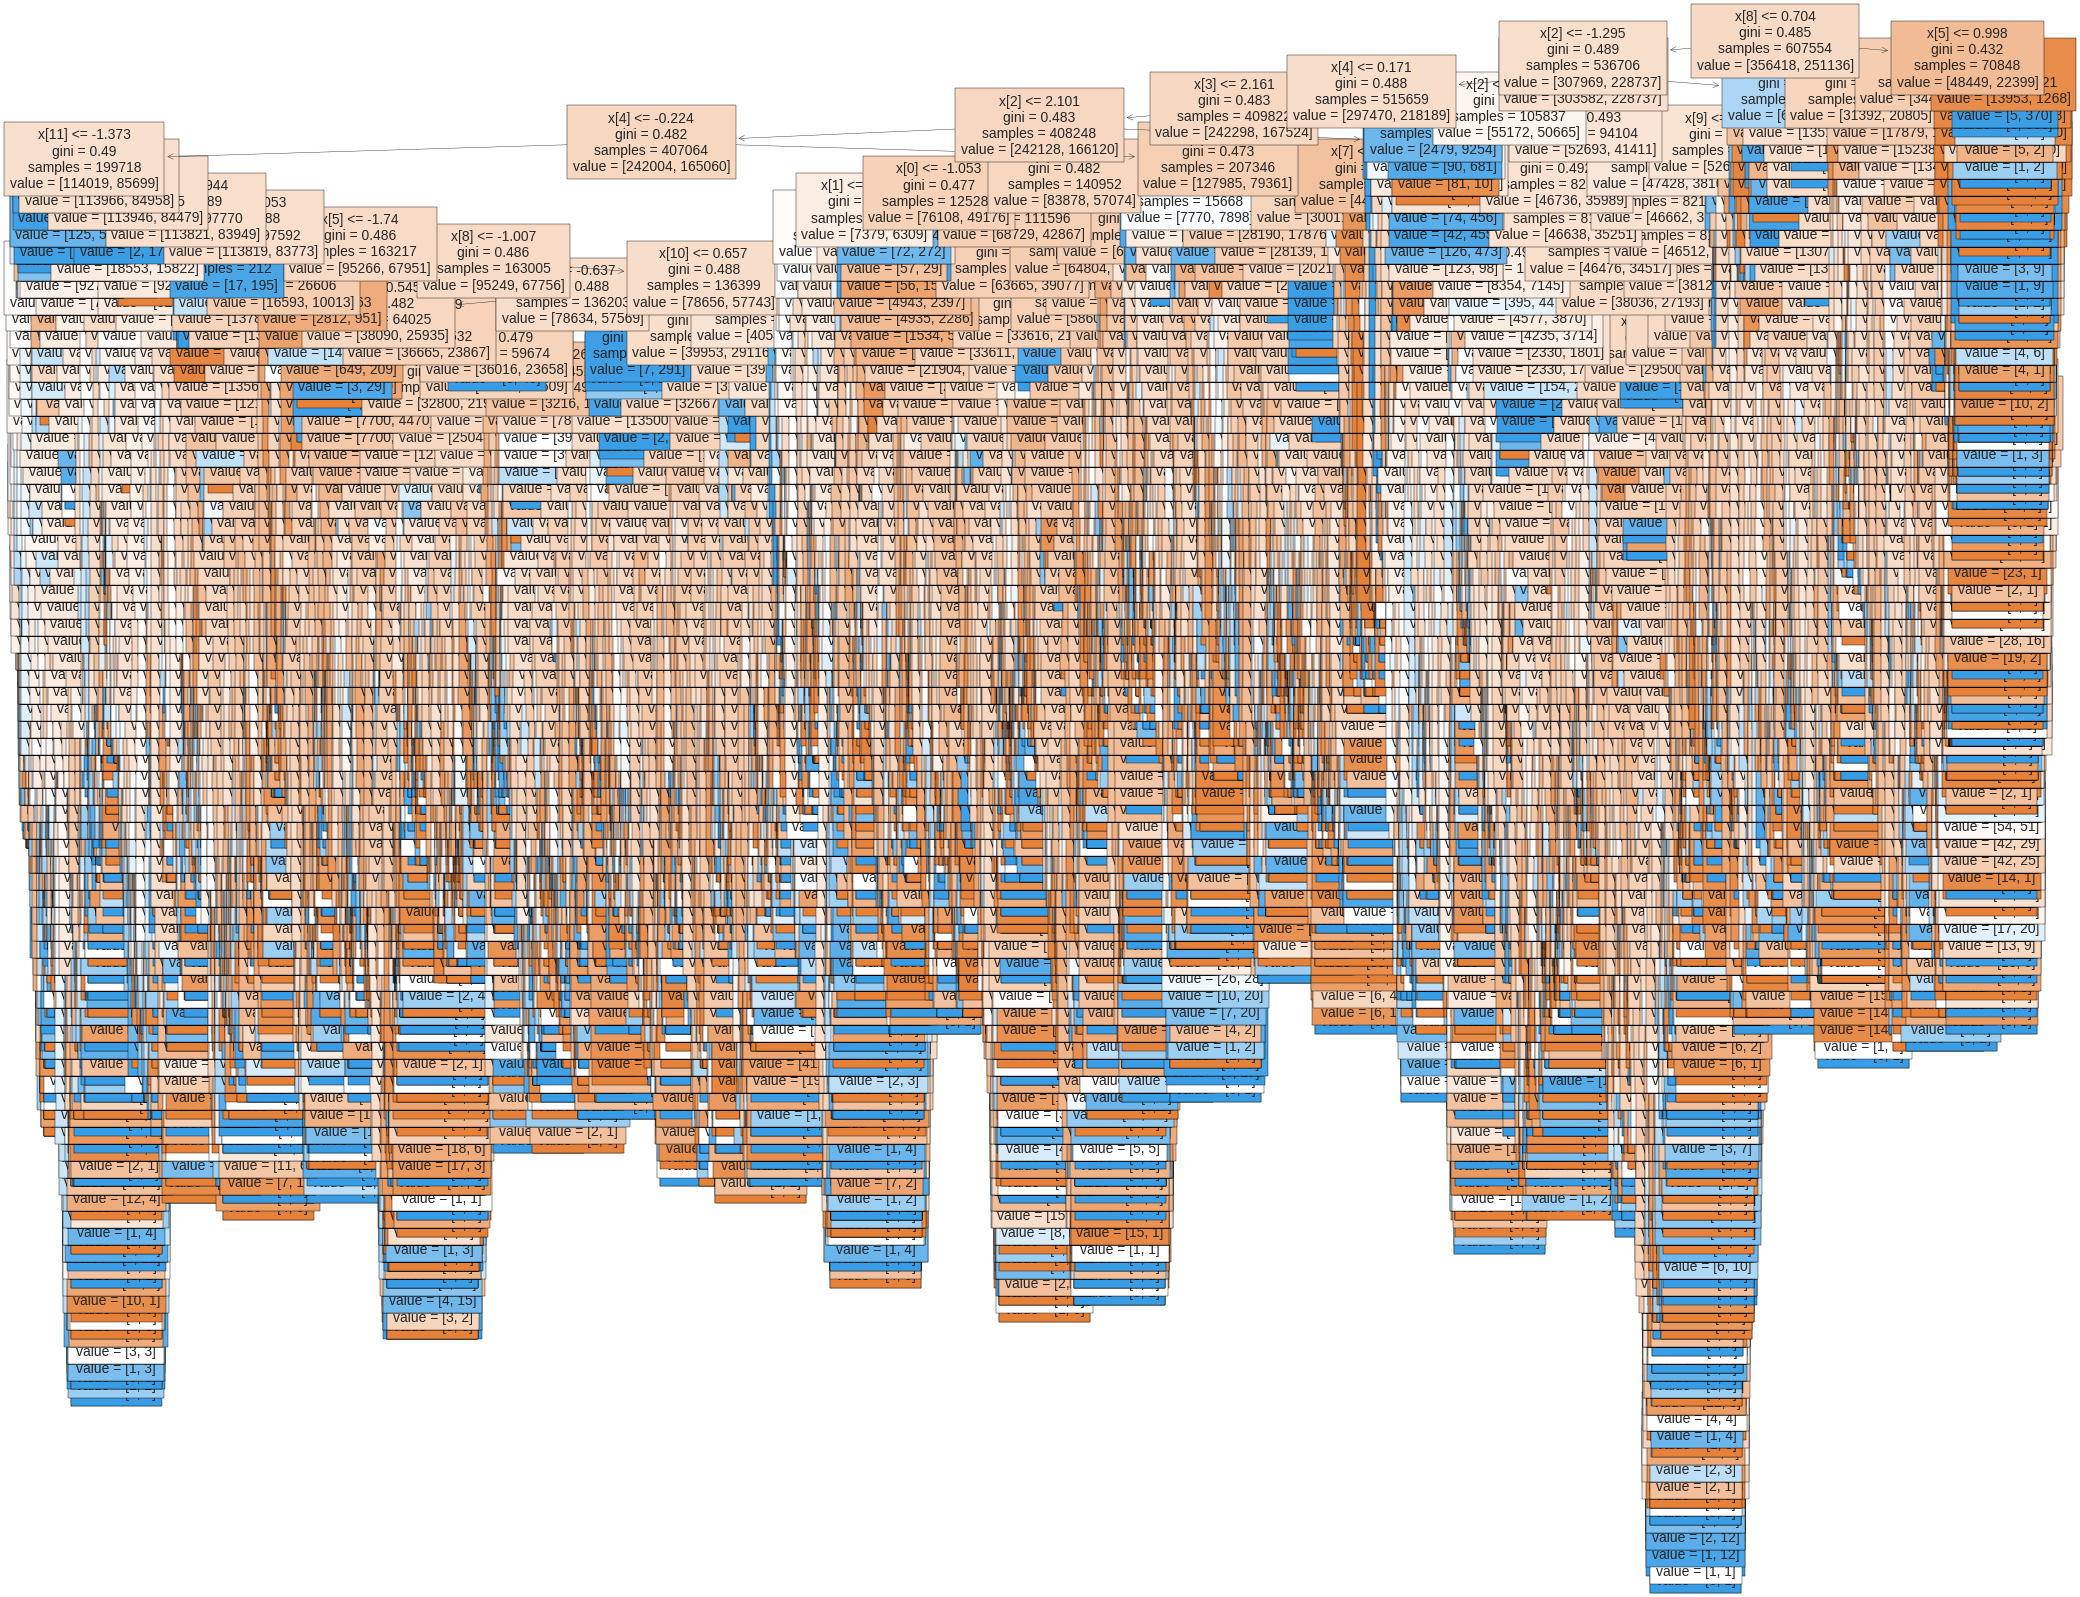

In [ ]:
from sklearn import tree
plt.figure(figsize=(25,20))
tree.plot_tree(dt,filled=True,fontsize=10)
plt.show()

Ensemble learning:


*   Bagging : Random Forest
*   Boosting : Ada Boost, Gradient Boost,  XG Boost



              precision    recall  f1-score   support

           0       0.84      0.92      0.88    364275
           1       0.86      0.76      0.81    256362

    accuracy                           0.85    620637
   macro avg       0.85      0.84      0.84    620637
weighted avg       0.85      0.85      0.85    620637

[[333553  30722]
 [ 62512 193850]]


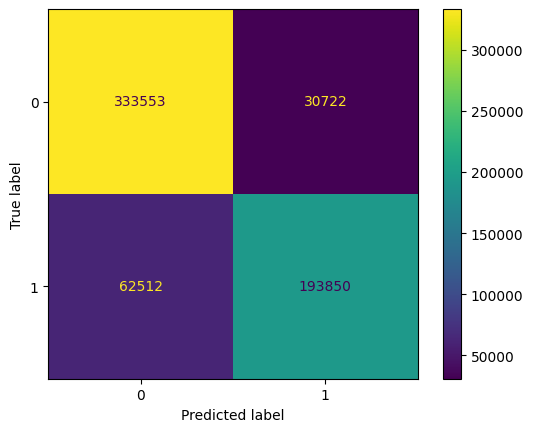

In [46]:
rf=RandomForestClassifier()
rf.fit(X_train_scaled,y_train)# model training

lr_pred = rf.predict(X_test_scaled)# testing



print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred,  labels=lr.classes_))
cm=confusion_matrix(y_test,lr_pred,  labels=lr.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_).plot()

In [ ]:
# Get the predicted probabilities
rf_probs = rf.predict_proba(X_test_scaled)

# Set a custom threshold
threshold = 0.63
rf_pred_custom_threshold = (rf_probs[:, 1] >= threshold).astype(int)

# Evaluate the model
print(classification_report(y_test, rf_pred_custom_threshold))
print(confusion_matrix(y_test, rf_pred_custom_threshold))

              precision    recall  f1-score   support



           0       0.64      0.97      0.77      5884

           1       0.85      0.22      0.35      4144



    accuracy                           0.66     10028

   macro avg       0.74      0.60      0.56     10028

weighted avg       0.72      0.66      0.60     10028



[[5720  164]

 [3239  905]]


Ada Boost

              precision    recall  f1-score   support



           0       0.61      0.92      0.73      5884

           1       0.58      0.15      0.24      4144



    accuracy                           0.60     10028

   macro avg       0.59      0.54      0.48     10028

weighted avg       0.59      0.60      0.53     10028



[[5435  449]

 [3532  612]]


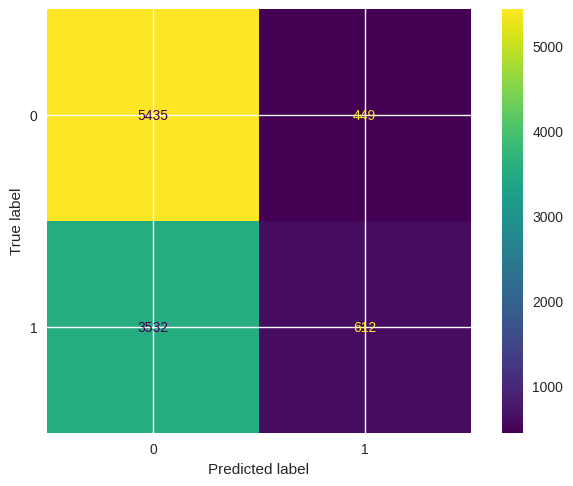

In [ ]:
adb=AdaBoostClassifier()
adb.fit(X_train_scaled,y_train)# model training

lr_pred = adb.predict(X_test_scaled)# testing

print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred,  labels=lr.classes_))
cm=confusion_matrix(y_test,lr_pred,  labels=lr.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_).plot()

Gradient Boost

              precision    recall  f1-score   support



           0       0.61      0.95      0.75      1171

           1       0.69      0.15      0.24       829



    accuracy                           0.62      2000

   macro avg       0.65      0.55      0.50      2000

weighted avg       0.65      0.62      0.54      2000



[[1117   54]

 [ 706  123]]


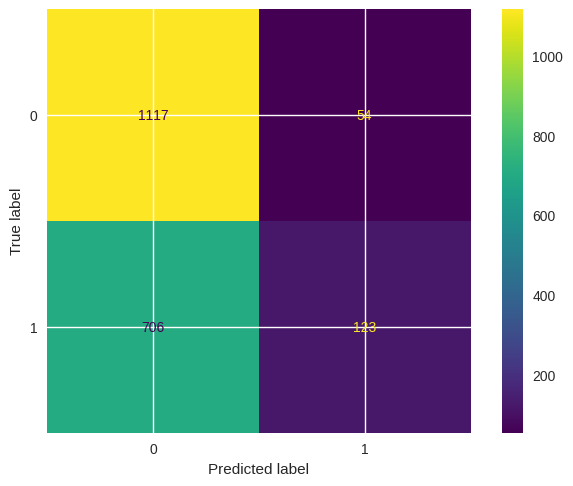

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(X_train_scaled,y_train)# model training

lr_pred = gb.predict(X_test_scaled)# testing

print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred,  labels=lr.classes_))
cm=confusion_matrix(y_test,lr_pred,  labels=lr.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_).plot()

XG Boost

In [ ]:
xgb=XGBClassifier()
xgb.fit(X_train_scaled,y_train)# model training

lr_pred = xgb.predict(X_test_scaled)# testing

print(classification_report(y_test,lr_pred))
print(confusion_matrix(y_test,lr_pred,  labels=lr.classes_))
cm=confusion_matrix(y_test,lr_pred,  labels=lr.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_).plot()

In [50]:
## Hyperparameter Training
# rf_params = {"max_depth": [5, 8, 15, None, 10],
#              "max_features": [5, 7, "auto", 8],
#              "min_samples_split": [2, 8, 15, 20],
#              "n_estimators": [100, 200, 500, 1000]}

# rf_params = {
#     "max_depth": [None, 10, 15, 20],
#     "max_features": ["auto", "sqrt", "log2"],
#     "min_samples_split": [2, 5, 10],
#     "n_estimators": [100, 200, 500, 1000]
# }

# knn_params = {
#     "n_neighbors": [3, 5, 7, 9, 11, 13,15,17,19,21,25,27,29,31,35,37,39],   # Number of neighbors to use
#     "weights": ["uniform", "distance"],    # How to weight the neighbors
#     "metric": ["euclidean", "manhattan", "minkowski"],  # Distance metrics
#     "p": [1, 2]  # Power parameter for Minkowski metric; 1=Manhattan, 2=Euclidean
# }

# adaboost_param={
#     "n_estimators":[50,60,70,80,90],
#     "algorithm":['SAMME','SAMME.R']
# }

# adaboost_param = {
#     "n_estimators": [50, 100, 200, 500],
#     "learning_rate": [0.01, 0.1, 0.5, 1.0],
#     "base_estimator__max_depth": [1, 2, 3, 5],  # Depth of the base decision tree
#     "base_estimator__min_samples_split": [2, 5, 10]  # Minimum samples to split a node
# }

# xgboost_params = {"learning_rate": [0.1, 0.01],
#                   "max_depth": [5, 8, 12, 20, 30],
#                   "n_estimators": [100, 200, 300],
#                   "colsample_bytree": [0.5, 0.8, 1, 0.3, 0.4]}

# gradient_params={"loss": ['log_loss','deviance','exponential'],
#              "criterion": ['friedman_mse','squared_error','mse'],
#              "min_samples_split": [2, 8, 15, 20],
#              "n_estimators": [100, 200, 500],
#               "max_depth": [5, 8, 15, None, 10]
#                 }

# gb_params = {
#     "n_estimators": [100, 200, 500, 1000],
#     "learning_rate": [0.01, 0.05, 0.1, 0.2],
#     "max_depth": [3, 4, 5, 6, 7],
#     "min_samples_split": [2, 5, 10],
#     "min_samples_leaf": [1, 2, 4],
#     "subsample": [0.7, 0.8, 0.9, 1.0],
#     "max_features": ["auto", "sqrt", "log2"]
# }

dt_params = {
    "criterion": ["gini", "entropy"],  # Function to measure the quality of a split
    "splitter": ["best", "random"],  # Strategy used to split at each node
    "max_depth": [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    "min_samples_split": [2, 5, 10, 20],  # Minimum number of samples required to split an internal node
    "min_samples_leaf": [1, 2, 4, 10],  # Minimum number of samples required to be at a leaf node
    "max_features": [None, "sqrt", "log2"],  # Number of features to consider for the best split
    "max_leaf_nodes": [None, 10, 20, 50, 100],  # Maximum number of leaf nodes in the tree
    "class_weight": [None, "balanced"]  # Weights associated with classes to handle imbalanced data
}

In [51]:
dt_params

{'criterion': ['gini', 'entropy'],
 'splitter': ['best', 'random'],
 'max_depth': [None, 10, 20, 30, 40, 50],
 'min_samples_split': [2, 5, 10, 20],
 'min_samples_leaf': [1, 2, 4, 10],
 'max_features': [None, 'sqrt', 'log2'],
 'max_leaf_nodes': [None, 10, 20, 50, 100],
 'class_weight': [None, 'balanced']}

In [53]:
# Models list for Hyperparameter tuning
randomcv_models = [
                  #  ("xgb", XGBClassifier(), xgboost_params)
                  # ("Random Forest", RandomForestClassifier(), rf_params),
                  # ("Ada Boost", AdaBoostClassifier(base_estimator=DecisionTreeClassifier()), adaboost_param)
                  # ("Gradient Boost", GradientBoostingClassifier(), gradient_params),
                  # ("KNN", KNeighborsClassifier(), knn_params)
#                     ("Gradient Boost", GradientBoostingClassifier(), gradient_params)
                    ("Decision Tree", DecisionTreeClassifier(), dt_params)

                   ]

In [54]:
randomcv_models

[('Decision Tree',
  DecisionTreeClassifier(),
  {'criterion': ['gini', 'entropy'],
   'splitter': ['best', 'random'],
   'max_depth': [None, 10, 20, 30, 40, 50],
   'min_samples_split': [2, 5, 10, 20],
   'min_samples_leaf': [1, 2, 4, 10],
   'max_features': [None, 'sqrt', 'log2'],
   'max_leaf_nodes': [None, 10, 20, 50, 100],
   'class_weight': [None, 'balanced']})]

In [55]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=5,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train_scaled, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=50, max_features=None, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=20, splitter=random; total time=   9.0s
[CV] END class_weight=None, criterion=gini, max_depth=20, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   2.8s
[CV] END class_weight=None, criterion=gini, max_depth=20, max_features=None, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=5, splitter=random; total time=   3.6s
[CV] END class_weight=None, criterion=gini, max_depth=40, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=  22.6s
[CV] END class_weight=None, criterion=gini, max_depth=40, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=  18.3s
[CV] END class_weight=None, criterion=gini, max_depth=40, max_fe

In [56]:
models={

    # "Random Forest":RandomForestClassifier(n_estimators=100,min_samples_split=2,
    #                                       max_features='log2',max_depth=10)
    # 'xgb': XGBClassifier(colsample_bytree=0.5, learning_rate=0.01, max_depth=8, n_estimators=100)
    # 'knn': KNeighborsClassifier(n_neighbors=46, weights='distance', metric='manhattan', p=1)
    # 'Ada Boost': AdaBoostClassifier(algorithm='SAMME.R', n_estimators=500,learning_rate=0.01,estimator=DecisionTreeClassifier(min_samples_split=5,max_depth=5))
#     'gradient boost': GradientBoostingClassifier(n_estimators=500, min_samples_split=15, loss='log_loss',criterion='squared_error',max_depth=5)
      'Decision Tree' : DecisionTreeClassifier(
    splitter='best',            # Strategy used to choose the split at each node
    min_samples_split=5,        # Minimum number of samples required to split an internal node
    min_samples_leaf=2,         # Minimum number of samples required to be at a leaf node
    max_leaf_nodes=None,        # Maximum number of leaf nodes; None means unlimited
    max_features=None,          # Number of features to consider when looking for the best split
    max_depth=40,               # Maximum depth of the tree; None means nodes are expanded until all leaves are pure
    criterion='gini',           # Function to measure the quality of a split ('gini' for the Gini impurity)
    class_weight=None,          # Weights associated with classes; None means all classes are weighted equally
    random_state=42             # Random state for reproducibility (optional)
)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_scaled, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))

    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))


    print('='*35)
    print('\n')

[CV] END class_weight=balanced, criterion=gini, max_depth=40, max_features=log2, max_leaf_nodes=50, min_samples_leaf=10, min_samples_split=10, splitter=best; total time=   8.3s
[CV] END class_weight=None, criterion=entropy, max_depth=20, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=  53.8s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=  19.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=10, max_features=None, max_leaf_nodes=20, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=  20.1s
[CV] END class_weight=balanced, criterion=gini, max_depth=20, max_features=None, max_leaf_nodes=None, min_samples_leaf=2, min_samples_split=20, splitter=random; total time=   6.8s
[CV] END class_weight=balanced, criterion=gini, max_depth=20, max_features=None, max_leaf_nodes=None, min_samples_lea

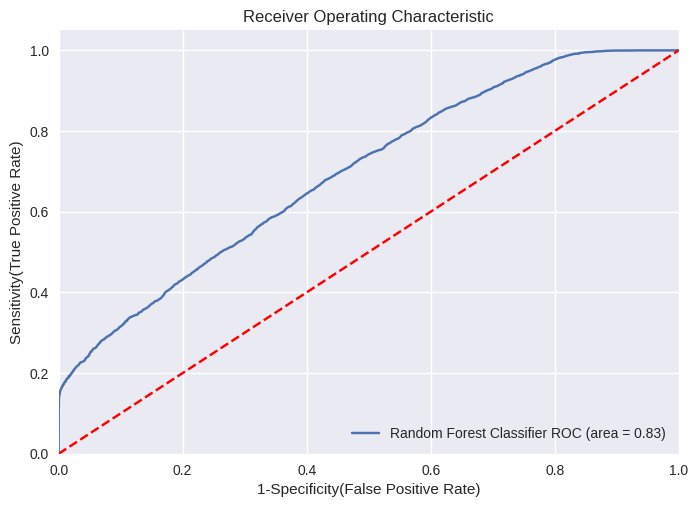

In [ ]:
## Plot ROC AUC Curve
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.8325
},

]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train the RandomForest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions and evaluate accuracy
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.5238888888888888


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
best_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Best Model Accuracy: {best_accuracy}")
print(f"Best Parameters: {grid_search.best_params()}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.

  warnings.warn(

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 

243 fits failed out of a total of 486.

The score on these train-test partitions for these parameters will be set to nan.

If these failures are not expected, you can try to debug them by setting error_score='raise'.



Below are more details about the failures:

--------------------------------------------------------------------------------

162 fits failed with the following error:

Traceback (most recent call last):

  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score

    estimator.fit(X_train, y_train, **fit_params)

  File "/usr/local/lib/python3.10/dist-packages/skle

Best Model Accuracy: 0.5473611111111111


AttributeError: 'GridSearchCV' object has no attribute 'best_params'

**K nearest neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier=KNeighborsClassifier(n_neighbors=30,algorithm='ball_tree')
classifier.fit(X_train_scaled,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=30)

In [ ]:

y_pred_knn=classifier.predict(X_test_scaled)

In [ ]:
score=accuracy_score(y_pred_knn,y_test)
print("KNN")
print(score)
print(classification_report(y_pred_knn,y_test))
print(confusion_matrix(y_pred_knn,y_test))

KNN

0.544

              precision    recall  f1-score   support



           0       0.77      0.56      0.65     13475

           1       0.27      0.49      0.35      4525



    accuracy                           0.54     18000

   macro avg       0.52      0.52      0.50     18000

weighted avg       0.64      0.54      0.57     18000



[[7594 5881]

 [2327 2198]]


**Naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train_scaled,y_train)

GaussianNB()

In [ ]:
y_pred_g=gnb.predict(X_test_scaled)

In [ ]:
score=accuracy_score(y_pred_g,y_test)
print("Naive bayes")
print(score)
print(classification_report(y_pred_g,y_test))
print(confusion_matrix(y_pred_g,y_test))

Naive bayes

0.4568888888888889

              precision    recall  f1-score   support



           0       0.09      0.55      0.15      1589

           1       0.91      0.45      0.60     16411



    accuracy                           0.46     18000

   macro avg       0.50      0.50      0.38     18000

weighted avg       0.84      0.46      0.56     18000



[[ 867  722]

 [9054 7357]]


SVC

In [ ]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')
svc.fit(X_train_scaled,y_train)

SVC(kernel='linear')

In [ ]:
y_pred1=svc.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
score=accuracy_score(y_pred1,y_test)
print("SVC")
print(score)
print(classification_report(y_pred1,y_test))
print(confusion_matrix(y_pred1,y_test))

SVC

0.5511666666666667

              precision    recall  f1-score   support



           0       1.00      0.55      0.71     18000

           1       0.00      0.00      0.00         0



    accuracy                           0.55     18000

   macro avg       0.50      0.28      0.36     18000

weighted avg       1.00      0.55      0.71     18000



[[9921 8079]

 [   0    0]]


rbf krrnal

In [ ]:
rbf=SVC(kernel='rbf')
rbf.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred2=svc.predict(X_test_scaled)


In [ ]:
print(classification_report(y_pred2,y_test))
print(confusion_matrix(y_pred2,y_test))

              precision    recall  f1-score   support



           0       1.00      0.55      0.71     18000

           1       0.00      0.00      0.00         0



    accuracy                           0.55     18000

   macro avg       0.50      0.28      0.36     18000

weighted avg       1.00      0.55      0.71     18000



[[9921 8079]

 [   0    0]]


Polynomial kernal

In [ ]:
polynomial=SVC(kernel='poly')
polynomial.fit(X_train_scaled,y_train)



SVC(kernel='poly')

In [ ]:
## Prediction
y_pred3=polynomial.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support



           0       0.55      0.98      0.71      9921

           1       0.43      0.02      0.03      8079



    accuracy                           0.55     18000

   macro avg       0.49      0.50      0.37     18000

weighted avg       0.50      0.55      0.40     18000



[[9725  196]

 [7932  147]]


Sigmoid

In [ ]:
sigmoid=SVC(kernel='sigmoid')
sigmoid.fit(X_train_scaled,y_train)


SVC(kernel='sigmoid')

In [ ]:
## Prediction
y_pred3=sigmoid.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

              precision    recall  f1-score   support



           0       0.55      0.55      0.55      9921

           1       0.45      0.45      0.45      8079



    accuracy                           0.51     18000

   macro avg       0.50      0.50      0.50     18000

weighted avg       0.51      0.51      0.51     18000



[[5493 4428]

 [4431 3648]]


Hyperparameter tuning svm

In [ ]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [ ]:
grid=GridSearchCV(SVC(),param_grid=param_grid,refit=True,cv=2,verbose=3)

In [ ]:
# randomcv=RandomizedSearchCV(SVC(),param_grid=param_grid,refit=True,cv=2,verbose=3)
randomcv=RandomizedSearchCV(estimator=SVC(),param_distributions=param_grid,cv=2)

In [ ]:
randomcv.fit(X_train_scaled,y_train)

RandomizedSearchCV(cv=2, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                                        'kernel': ['rbf']})

In [ ]:
## Prediction
y_pred4=randomcv.predict(X_test_scaled)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))

              precision    recall  f1-score   support



           0       0.55      1.00      0.71      9921

           1       0.00      0.00      0.00      8079



    accuracy                           0.55     18000

   macro avg       0.28      0.50      0.36     18000

weighted avg       0.30      0.55      0.39     18000



[[9921    0]

 [8079    0]]


In [ ]:
grid.fit(X_train_scaled,y_train)

Fitting 2 folds for each of 25 candidates, totalling 50 fits

[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=  54.3s

[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=  54.6s

[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=  43.4s

[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=  43.6s

[CV 1/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=  42.3s

[CV 2/2] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=  42.6s

[CV 1/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.551 total time=  39.8s

[CV 2/2] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.551 total time=  40.3s

[CV 1/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.551 total time=  39.4s

[CV 2/2] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.551 total time=  39.4s

[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.539 total time= 1.2min

[CV 2/2] END ..........C=1, gamma=1,

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
## Prediction
y_pred5=grid.predict(X_test_scaled)
print(classification_report(y_test,y_pred5))
print(confusion_matrix(y_test,y_pred5))

              precision    recall  f1-score   support



           0       0.55      1.00      0.71      9921

           1       0.00      0.00      0.00      8079



    accuracy                           0.55     18000

   macro avg       0.28      0.50      0.36     18000

weighted avg       0.30      0.55      0.39     18000



[[9921    0]

 [8079    0]]
